In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disaster-images-dataset-cnn-model/best_model.h5
/kaggle/input/disaster-images-dataset-cnn-model/history
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/readme.txt
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/623.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/764.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/771.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/208.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/820.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/473.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterMod

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.3110 - loss: 1.4035 - val_accuracy: 0.3042 - val_loss: 1.3742 - learning_rate: 0.0010
Epoch 2/30
 1/99 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.3125 - loss: 1.3611

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - accuracy: 0.3125 - loss: 1.3611 - val_accuracy: 0.3042 - val_loss: 1.3743 - learning_rate: 0.0010
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2900 - loss: 1.3834 - val_accuracy: 0.3042 - val_loss: 1.3730 - learning_rate: 0.0010
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.3125 - loss: 1.4011 - val_accuracy: 0.3042 - val_loss: 1.3726 - learning_rate: 0.0010
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.3148 - loss: 1.3762 - val_accuracy: 0.3042 - val_loss: 1.3742 - learning_rate: 0.0010
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.3750 - loss: 1.3460 - val_accuracy: 0.3042 - val_loss: 1.3745 - learning_rate: 0.0010
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2979 - loss: 1.3800 - val_accuracy: 0.3042 - val_loss: 1.3684 - learning_rate: 0.0010
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.2812 - loss: 1.3989 - val_accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


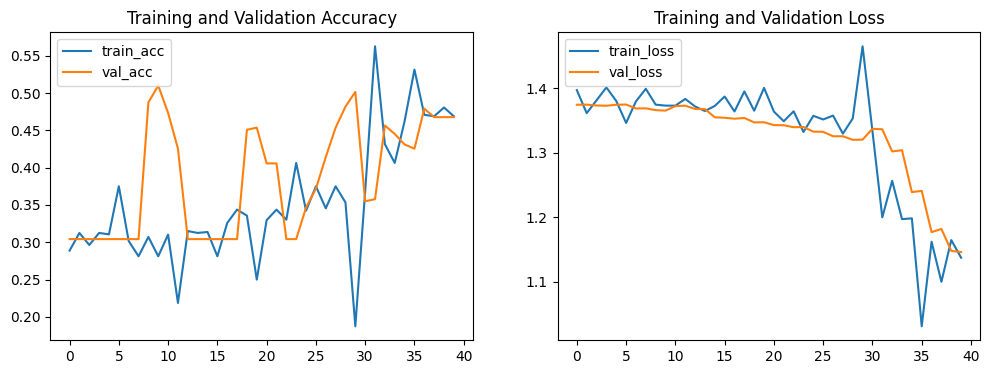

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
dataset_dir = '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset'

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4
EPOCHS = 30

# Advanced preprocessing function using CLAHE on LAB color space
def preprocess_image(img_path):
    # Read image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize
    img = cv2.resize(img, IMAGE_SIZE)
    # Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    # Merge channels and convert back
    merged = cv2.merge((cl, a, b))
    processed = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)
    # Normalize to [0,1]
    processed = processed.astype(np.float32) / 255.0
    return processed

# Load images and labels
labels_map = {"Cyclone":0, "Wildfire":1, "Flood":2, "Earthquake":3}
images = []
labels = []

for label_name, label_idx in labels_map.items():
    folder = os.path.join(dataset_dir, label_name)
    for img_file in os.listdir(folder):
        path = os.path.join(folder, img_file)
        try:
            img = preprocess_image(path)
            images.append(img)
            labels.append(label_idx)
        except Exception as e:
            print(f"Error processing {path}: {e}")

images = np.array(images)
labels = tf.keras.utils.to_categorical(labels, NUM_CLASSES)

# Train-test split
y_train, y_test, X_train, X_test = train_test_split(labels, images, test_size=0.2, random_state=42, stratify=labels)
# Note: split X and y correctly
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

# Build CNN model using transfer learning
base_model = EfficientNetB0(include_top=False, input_shape=(*IMAGE_SIZE, 3), weights='imagenet')
base_model.trainable = False # Freeze for initial training

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    callbacks=[early_stop, reduce_lr]
)

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    validation_data=(X_val, y_val),
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=list(labels_map.keys())))

# Save best model
model.save('best_disaster_cnn_model.h5')

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()